In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(rc={'figure.figsize':(11,7)})

/tmp/ipykernel_738/1888597303.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


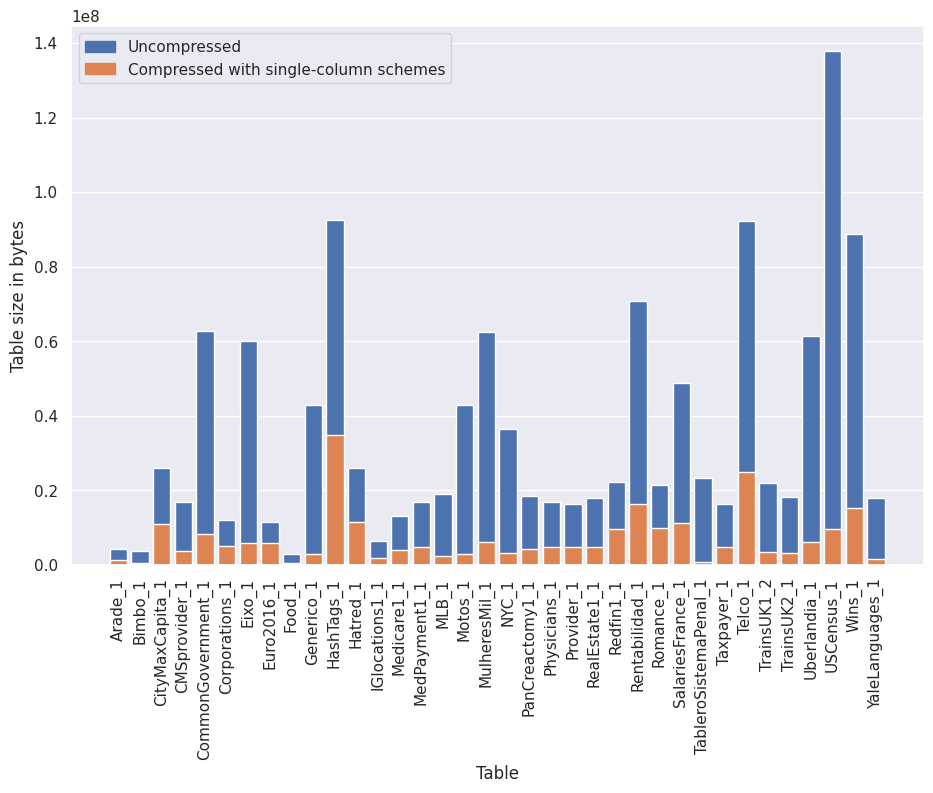

In [11]:
dfs = pd.read_csv(f'../1/relation_stats.csv', delimiter="|", nrows=36)
# dfs["Compression Ratio"] = dfs["uncompressed"]/dfs["compressed"]

# mean = dfs["Compression Ratio"].mean()

# g = sns.barplot(x=dfs["Relation"], y=dfs["Compression Ratio"])
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
# # plt.title("Single-Column Compression Ratios")
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.xlabel("Table")

import matplotlib.patches as mpatches

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["uncompressed"])
p = ax.bar(dfs["Relation"], dfs["compressed"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# plt.title("How much C3 improved for each table")
plt.ylabel("Table size in bytes")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Uncompressed')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='Compressed with single-column schemes')   
handles.extend([patch, patch2])
plt.legend(handles=handles)


6.723611111111111


/tmp/ipykernel_738/3202323865.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(1.0, 30.0)

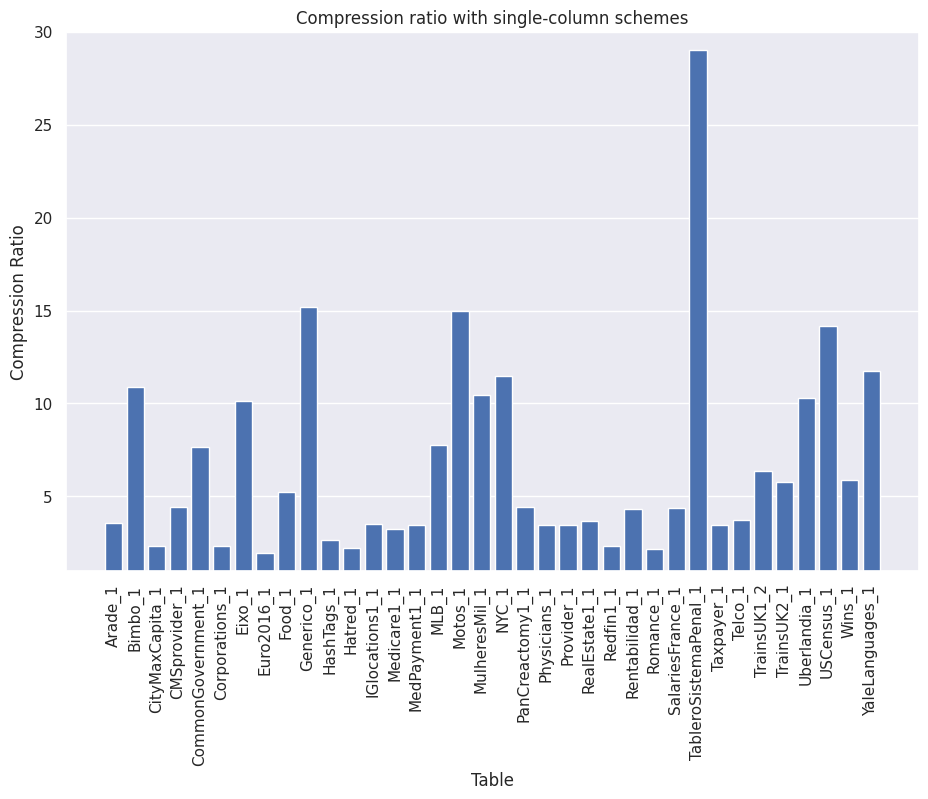

In [30]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../1/relation_stats.csv', delimiter="|", nrows=36)

dfs["compression_ratio"] = [round(x,2) for x in dfs["uncompressed"] / dfs["compressed"]]

print(dfs["compression_ratio"].mean())

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["compression_ratio"], color=sns.color_palette()[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# plt.title("How much C3 improved for each table")
plt.ylabel("Compression Ratio")
plt.xlabel("Table")

# Manual Legend
# handles, labels = ax.get_legend_handles_labels()
# patch = mpatches.Patch(color=sns.color_palette()[0], label='Baseline')   
# patch2 = mpatches.Patch(color=sns.color_palette()[1], label='C3')   
# handles.extend([patch, patch2])
# plt.legend(handles=handles)

plt.title("Compression ratio with single-column schemes")
plt.ylim(1, 30)


['1-to-1 Dictionary', '1-to-N Dictionary', 'DFOR', 'Dictionary-Sharing', 'Equality', 'Numerical']
[[1.0935100255179244, 1.148907547204648, 1.1709674830248655, 1.1723240405056805, 1.1708760542005079, 1.1795512930535084, 1.1794642015629266, 1.1785174098948703], [1.125290802926313, 1.1344572878817365, 1.1710249022047503, 1.1798918470313895, 1.1961633023399216, 1.1960528835992554, 1.1969168125606833, 1.1991198902957119], [1.0028678731448142, 1.0020633478512897, 1.0104348411059738, 1.0247666537538294, 1.0265146668685063, 1.031173500009325, 1.0311023817791485, 1.0309476297948816], [1.0402352048831223, 1.0428126777178066, 1.0437464021066247, 1.0469216620102444, 1.0494989617976402, 1.0493930966954323, 1.048938116905627, 1.0488335662716313], [1.0762930024146382, 1.0755206698047595, 1.0767188999708426, 1.077886261538416, 1.0766641228545926, 1.0754052263241072, 1.0739132228201635, 1.0708854730474917], [1.0047084895240903, 1.0052124936452929, 1.004865813628123, 1.0061088442449815, 1.00672217183855

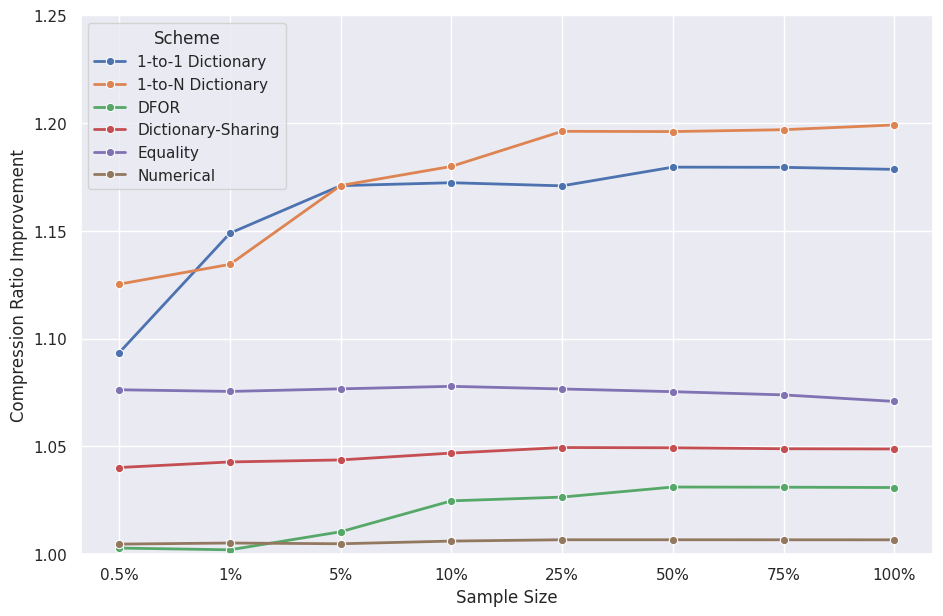

In [12]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
schemes = ["d1to1", "d1ton", "dfor", "dshare", "equality", "numerical"]
scheme_names = ["1-to-1 Dictionary", "1-to-N Dictionary", "DFOR", "Dictionary-Sharing", "Equality", "Numerical"]
dfs = []
for scheme in schemes:
    scheme_sample_sizes = []
    for sample_size in sample_sizes:
        df = pd.read_csv(f'../2/{scheme}/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
        df["improvement"] = df["compressed"]/df["c3_compressed"]
        scheme_sample_sizes.append(df)
    dfs.append(scheme_sample_sizes)

avg_cris = []
for df in dfs:
    avg_cris.append([sample_size.loc[:,'improvement'].mean() for sample_size in df])

print(scheme_names)
print(avg_cris)

df = pd.DataFrame(avg_cris)
df = df.transpose()
df = df.set_axis(scheme_names, axis=1)
df["sample_size"] = sample_size_labels

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Scheme', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Scheme', 
                    marker="o",
                    linewidth = 2,
                    data=df)
# plt.title("CRI of individual C3 schemes")
plt.ylim(1, 1.25)
plt.show(plot)

[[1.23, 1.24, 1.24, 1.24, 1.26, 1.27, 1.26, 1.26]]
      0 sample_size
0  1.23        0.5%
1  1.24          1%
2  1.24          5%
3  1.24         10%
4  1.26         25%
5  1.27         50%
6  1.26         75%
7  1.26        100%


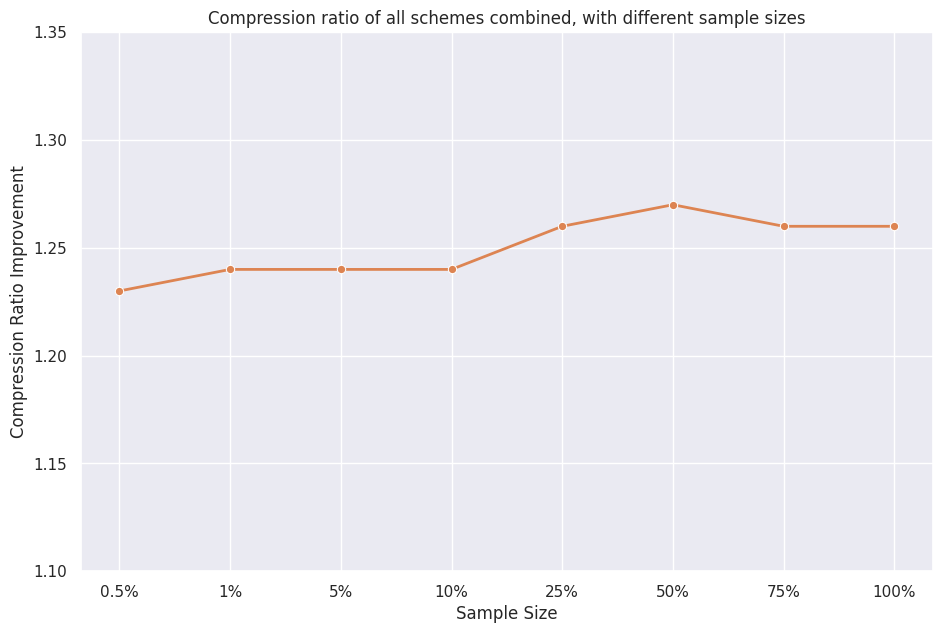

In [31]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]

dfs_reverse = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = [round(x,2) for x in df["compressed"]/df["c3_compressed"]]
    dfs_reverse.append(df)

avg_improvement = []
avg_improvement.append([round(df['improvement'].mean(),2) for df in dfs_reverse])

print(avg_improvement)

df = pd.DataFrame(avg_improvement)
df = df.transpose()
df["sample_size"] = sample_size_labels

print(df)

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    color=sns.color_palette()[1])

plt.title("Compression ratio of all schemes combined, with different sample sizes")
plt.ylim(1.1, 1.35)
plt.show(plot)


   Sample Size reversed_or_final  Scheme Count
0         0.5%     final_schemes           581
1           1%     final_schemes           589
2           5%     final_schemes           715
3          10%     final_schemes           725
4          25%     final_schemes           680
5          50%     final_schemes           615
6          75%     final_schemes           597
7         100%     final_schemes           588
8         0.5%         reversals            57
9           1%         reversals            28
10          5%         reversals            33
11         10%         reversals            27
12         25%         reversals             6
13         50%         reversals             2
14         75%         reversals             0
15        100%         reversals             0


Text(0.5, 1.0, 'Compression ratio of all schemes combined, with and without scheme reversing')

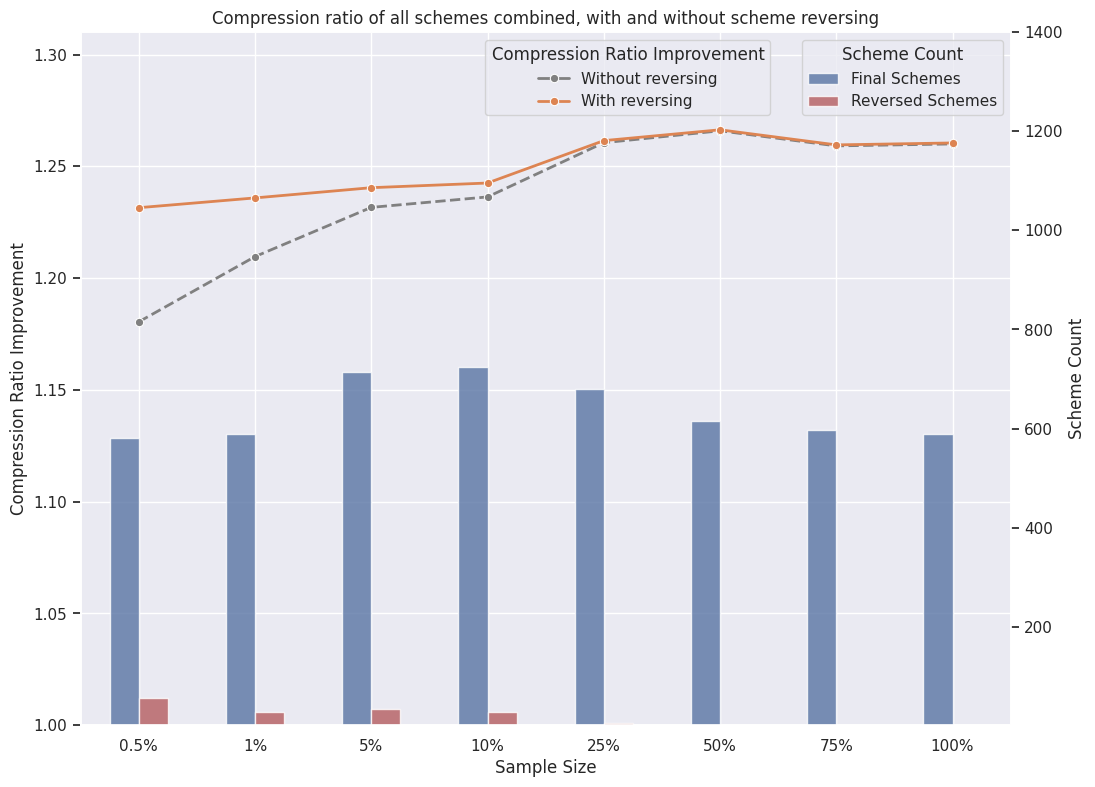

In [14]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]

dfs_no_reverse = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../3/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = df["compressed"]/df["c3_compressed"]
    dfs_no_reverse.append(df)

dfs_reverse = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = df["compressed"]/df["c3_compressed"]
    dfs_reverse.append(df)

avg_improvement = []
avg_improvement.append([df['improvement'].mean() for df in dfs_no_reverse])
avg_improvement.append([df['improvement'].mean() for df in dfs_reverse])

df = pd.DataFrame(avg_improvement)
df = df.transpose()
df["sample_size"] = sample_size_labels

fig, ax1 = plt.subplots(figsize=(12,9))

# LINE CHART

df_melt = pd.melt(df, ['sample_size'])
df_melt.rename(columns={'variable':'Reversing', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Reversing', 
                    marker="o",
                    linewidth = 2,
                    data=df_melt,
                    ax=ax1,
                    palette=["grey",sns.color_palette()[1]])
ax1.lines[0].set_linestyle("--")

ax1.set_ylim(1, 1.31)
handles, labels = ax1.get_legend_handles_labels()
labels = ["Without reversing", "With reversing"]
ax1.legend(handles, labels, loc=4, title="Compression Ratio Improvement")
sns.move_legend(ax1, "upper right", bbox_to_anchor=(0.75, 1))

# BAR CHART

df = pd.DataFrame(
    {'final_schemes': [581, 589, 715, 725, 680, 615, 597, 588],
     'reversals': [57, 28, 33, 27, 6, 2, 0, 0],
     'sample_size': sample_size_labels
    })

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'reversed_or_final',
                   'value': 'Scheme Count',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
print(df)
ax2 = ax1.twinx()
ax2.grid(False)
sns.barplot(data = df, x='Sample Size', y='Scheme Count', hue='reversed_or_final', alpha=0.8, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0],sns.color_palette()[3]])

ax2.set_ylim(1,1400)
handles, labels = ax2.get_legend_handles_labels()
labels = ["Final Schemes", "Reversed Schemes"]
ax2.legend(handles, labels, loc=4, title="Scheme Count")
sns.move_legend(ax2, "upper right", bbox_to_anchor=(1, 1))

plt.title("Compression ratio of all schemes combined, with and without scheme reversing")
# plt.show(plot)

[[1.23, 1.24, 1.24, 1.24, 1.26, 1.27, 1.26, 1.26], [1.16, 1.16, 1.17, 1.18, 1.18, 1.19, 1.18, 1.18]]
      0     1 sample_size
0  1.23  1.16        0.5%
1  1.24  1.16          1%
2  1.24  1.17          5%
3  1.24  1.18         10%
4  1.26  1.18         25%
5  1.27  1.19         50%
6  1.26  1.18         75%
7  1.26  1.18        100%


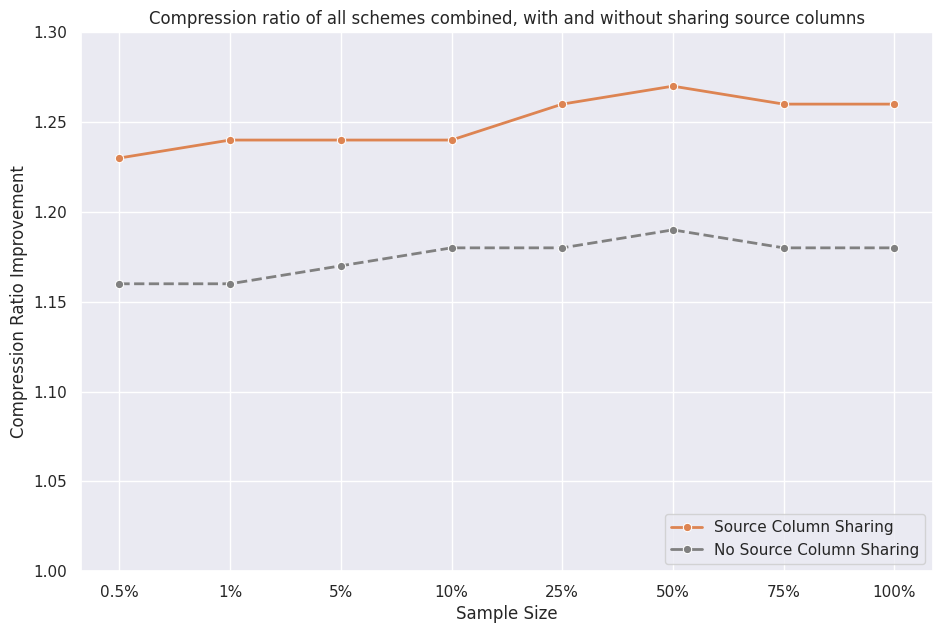

In [15]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]

dfs_reverse = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = [round(x,2) for x in df["compressed"]/df["c3_compressed"]]
    dfs_reverse.append(df)

dfs_no_share = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../5/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = [round(x,2) for x in df["compressed"]/df["c3_compressed"]]
    dfs_no_share.append(df)

avg_improvement = []
avg_improvement.append([round(df['improvement'].mean(),2) for df in dfs_reverse])
avg_improvement.append([round(df['improvement'].mean(),2) for df in dfs_no_share])

print(avg_improvement)

df = pd.DataFrame(avg_improvement)
df = df.transpose()
df["sample_size"] = sample_size_labels

print(df)

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Pruning', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    palette=[sns.color_palette()[1], "grey"])
plt.gca().lines[1].set_linestyle("--")

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Source Column Sharing", "No Source Column Sharing"]
plt.gca().legend(handles, labels, loc=4)

plt.title("Compression ratio of all schemes combined, with and without sharing source columns")
plt.ylim(1, 1.3)
plt.show(plot)


[[1.2315155347695754, 1.2358925163240067, 1.2404678918322833, 1.2425541193200278, 1.261513355356326, 1.266364290811077, 1.2596119738706864, 1.260483997833731], [1.180454357600676, 1.2096365276406482, 1.231657521376426, 1.236334340103309, 1.2605810572811498, 1.2659144466524095, 1.2591615173751112, 1.2600345243491005]]
          0         1 sample_size
0  1.231516  1.180454        0.5%
1  1.235893  1.209637          1%
2  1.240468  1.231658          5%
3  1.242554  1.236334         10%
4  1.261513  1.260581         25%
5  1.266364  1.265914         50%
6  1.259612  1.259162         75%
7  1.260484  1.260035        100%


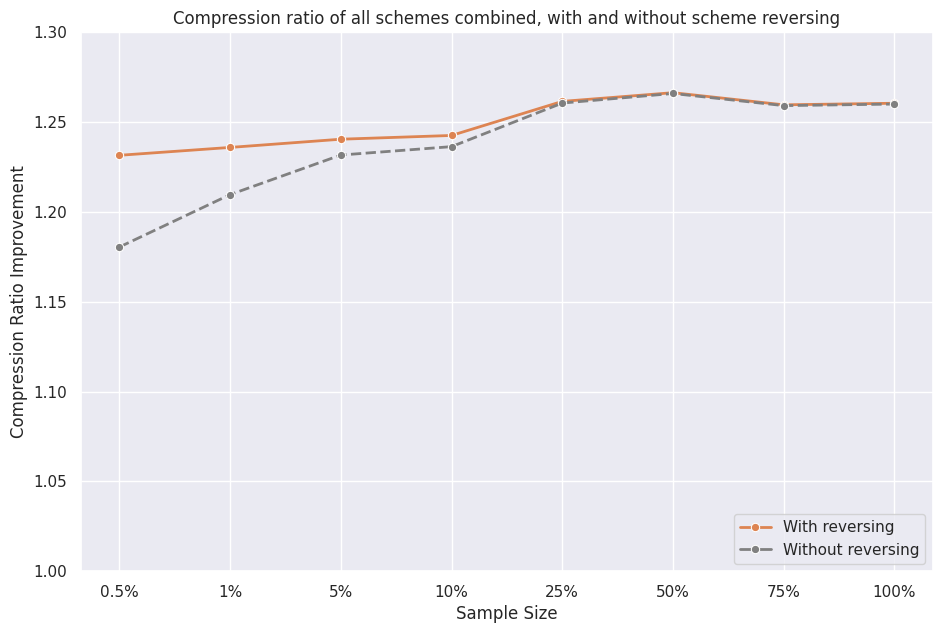

In [32]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]


dfs_no_share = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../3/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = df["compressed"]/df["c3_compressed"]
    dfs_no_share.append(df)
    
dfs_reverse = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = df["compressed"]/df["c3_compressed"]
    dfs_reverse.append(df)

avg_improvement = []
avg_improvement.append([df['improvement'].mean() for df in dfs_reverse])
avg_improvement.append([df['improvement'].mean() for df in dfs_no_share])

print(avg_improvement)
# avg_improvement[0][5] = 1.26
# avg_improvement[1][5] = 1.26
# avg_improvement[1][3] = 1.23

df = pd.DataFrame(avg_improvement)
df = df.transpose()
df["sample_size"] = sample_size_labels

print(df)

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Pruning', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    palette=[sns.color_palette()[1], "grey"],
                    zorder=4)
plt.gca().lines[1].set_linestyle("--")

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["With reversing", "Without reversing"]
plt.gca().legend(handles, labels, loc=4)

plt.title("Compression ratio of all schemes combined, with and without scheme reversing")
plt.ylim(1, 1.3)
plt.show(plot)


([<matplotlib.patches.Wedge at 0x7efd4678cac0>,
 [Text(-1.0217993470895146, 0.40734026843345805, '1-to-1 Dictionary'),
  Text(0.21604017843662007, -1.0785762102425, '1-to-N Dictionary'),
  Text(1.0173884032806297, -0.41823538452657344, 'Numerical'),
  Text(1.0924098034824754, -0.1289993071895342, 'Dictionary-Sharing'),
  Text(1.023961127763976, 0.4018751159605762, 'DFOR'),
  Text(0.5035742497286891, 0.9779636879814035, 'Equality')],
 [Text(-0.5573450984124625, 0.22218560096370438, '37.93%'),
  Text(0.11784009732906547, -0.588314296495909, '30.44%'),
  Text(0.5549391290621616, -0.22812839155994913, '0.85%'),
  Text(0.5958598928086228, -0.07036325846701864, '7.82%'),
  Text(0.5585242515076232, 0.21920460870576883, '7.82%'),
  Text(0.2746768634883759, 0.5334347388989473, '15.14%')])

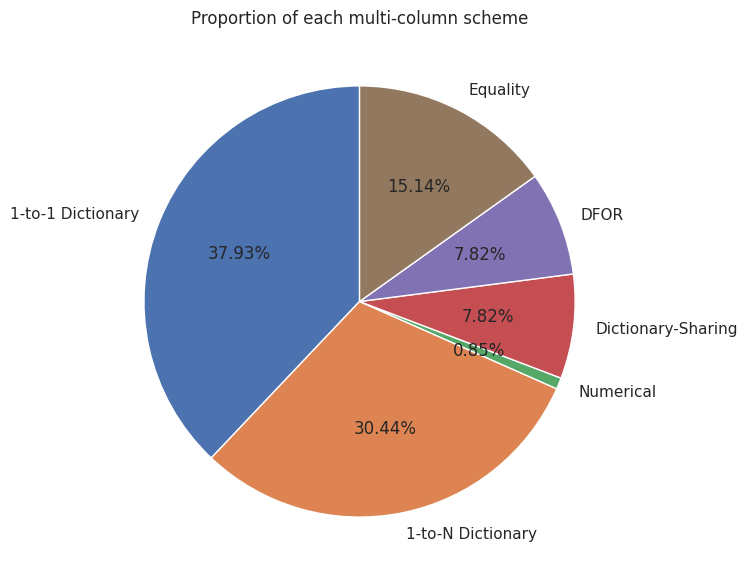

In [35]:
sample_sizes = ["65536"] # ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

schemes = ["Dict_1to1", "Dict_1toN", "Numerical", "Dict_Sharing", "DFOR", "Equality"]
scheme_names = ["1-to-1 Dictionary", "1-to-N Dictionary", "Numerical", "Dictionary-Sharing", "DFOR", "Equality"]
scheme_counts = dict.fromkeys(schemes, 0)
for i in range(0,len(sample_sizes)):
    for scheme in schemes:
        scheme_counts[scheme] += dfs[i]["C3_Scheme"].value_counts()[scheme]


keys = list(scheme_counts.keys())
vals = [scheme_counts[k] for k in keys]
plt.title("Proportion of each multi-column scheme")
plt.pie(vals, labels=scheme_names, startangle=90, autopct='%1.2f%%')

/tmp/ipykernel_738/3571832300.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(1.0, 3.0)

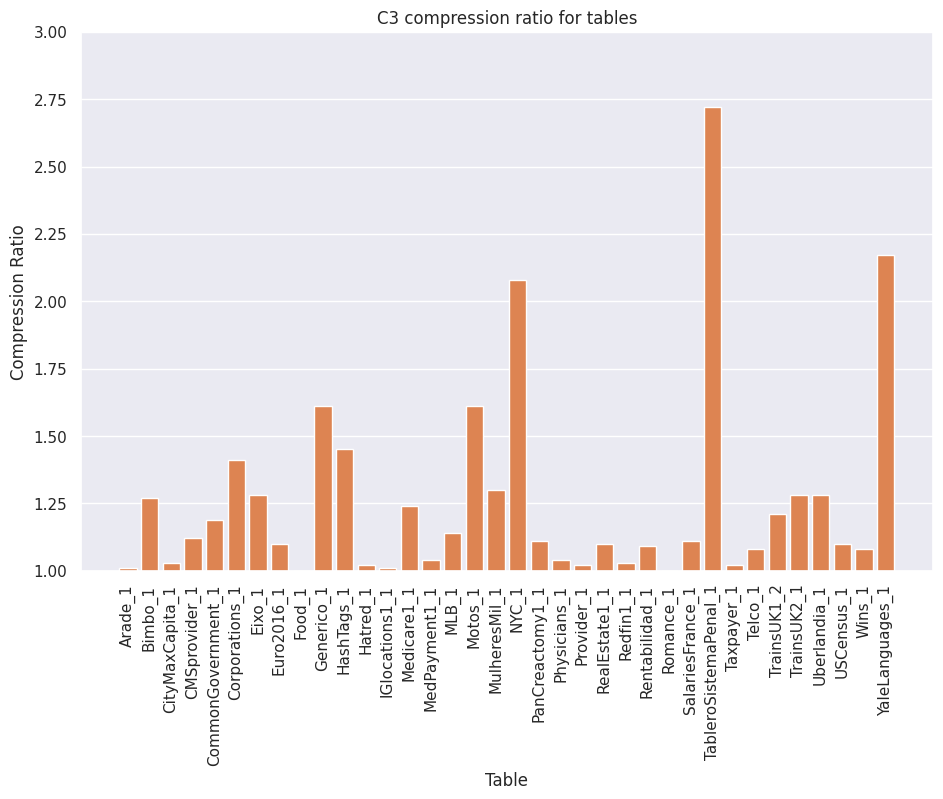

In [18]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../4/65536/relation_stats.csv', delimiter="|", nrows=36)

dfs["compression_ratio"] = [round(x,2) for x in dfs["compressed"] / dfs["c3_compressed"]]

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["compression_ratio"], color=sns.color_palette()[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# plt.title("How much C3 improved for each table")
plt.ylabel("Compression Ratio")
plt.xlabel("Table")

# Manual Legend
# handles, labels = ax.get_legend_handles_labels()
# patch = mpatches.Patch(color=sns.color_palette()[0], label='Baseline')   
# patch2 = mpatches.Patch(color=sns.color_palette()[1], label='C3')   
# handles.extend([patch, patch2])
# plt.legend(handles=handles)

plt.title("C3 compression ratio for tables")
plt.ylim(1, 3)


/tmp/ipykernel_794/2515567340.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=df["pruning"], x=df["Excepted compression ratios computed (in millions)"], palette=colors, width=0.5, orient = 'h').set_title("Excepted compression ratios computed (in millions)")
/tmp/ipykernel_794/2515567340.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y=df["pruning"], x=df["Schemes added to correlation graph (in thousands)"], palette=colors, width=0.5, orient = 'h').set_title("Schemes added to correlation graph (in thousands)")
/tmp/ipykernel_794/2515567340.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

[Text(0.5, 0, '')]

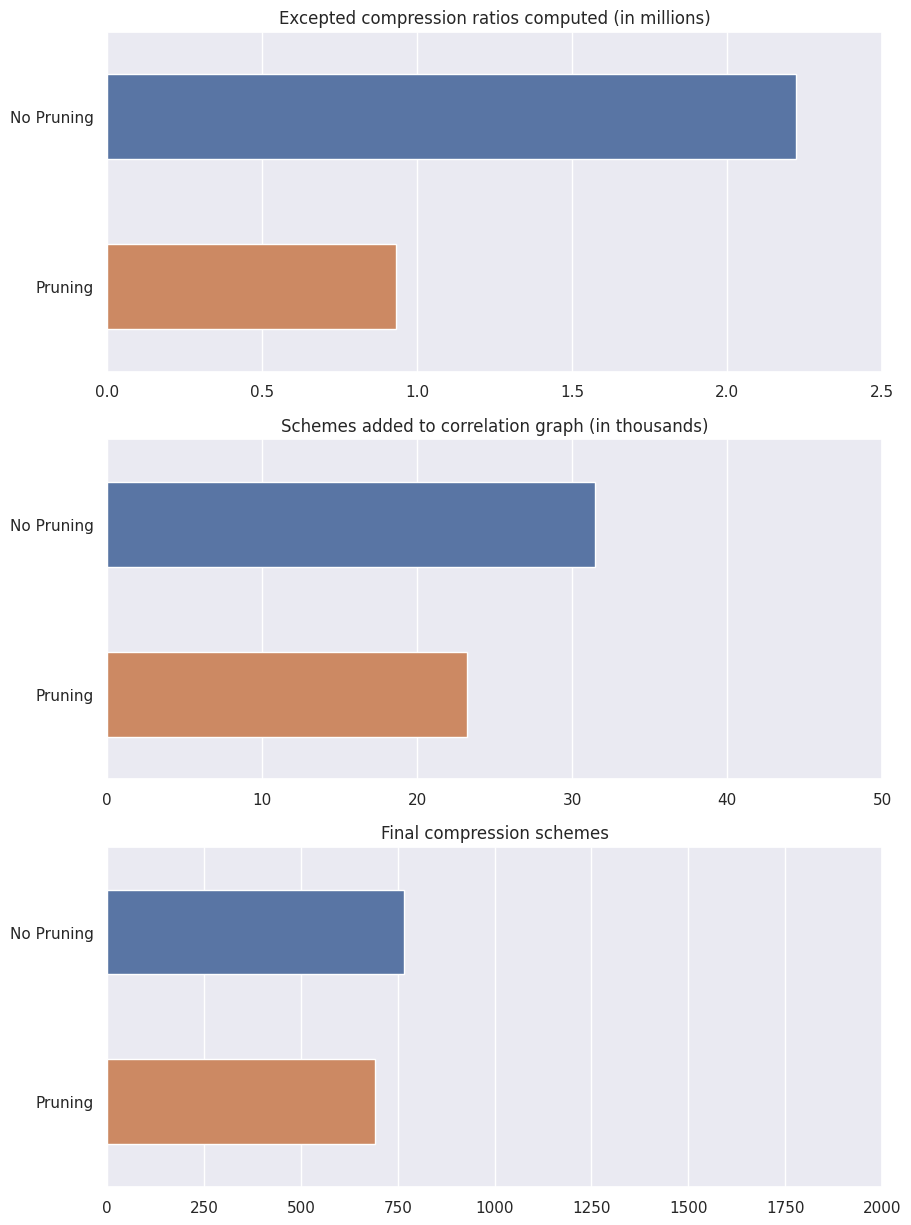

In [253]:
# how many ECR computations can be skipped due to pruning
sample_sizes = ["65536"] # ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_pruning = []
for sample_size in sample_sizes:
    dfs_pruning.append(pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

d = {"Excepted compression ratios computed (in millions)": [sum(dfs[0]["compute_ecr_counter"]), sum(dfs_pruning[0]["compute_ecr_counter"])],
     "Schemes added to correlation graph (in thousands)": [sum(dfs[0]["add_to_graph_counter"]), sum(dfs_pruning[0]["add_to_graph_counter"])],
     "Final compression schemes used": [sum(dfs[0]["final_scheme_counter"]), sum(dfs_pruning[0]["final_scheme_counter"])]}
df = pd.DataFrame(d)
df["pruning"] = ["No Pruning", "Pruning"]
df["Excepted compression ratios computed (in millions)"] = [x/1000000 for x in df["Excepted compression ratios computed (in millions)"]]
df["Schemes added to correlation graph (in thousands)"] = [x/1000 for x in df["Schemes added to correlation graph (in thousands)"]]
# print(df)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# fig.tight_layout()
# fig.suptitle("Number of C3 schemes reduced through pruning in each compression stage")

colors = sns.color_palette()[:2]

sns.barplot(ax=axes[0], y=df["pruning"], x=df["Excepted compression ratios computed (in millions)"], palette=colors, width=0.5, orient = 'h').set_title("Excepted compression ratios computed (in millions)")
axes[0].ticklabel_format(style='plain', axis='x')
axes[0].set_xlim(0,2.5)
axes[0].set(ylabel=None)
axes[0].set(xlabel=None)

sns.barplot(ax=axes[1], y=df["pruning"], x=df["Schemes added to correlation graph (in thousands)"], palette=colors, width=0.5, orient = 'h').set_title("Schemes added to correlation graph (in thousands)")
axes[1].set_xlim(0,50)
axes[1].set(ylabel=None)
axes[1].set(xlabel=None)

sns.barplot(ax=axes[2], y=df["pruning"], x=df["Final compression schemes used"], palette=colors, width=0.5, orient = 'h').set_title("Final compression schemes")
axes[2].set_xlim(0,2000)
axes[2].set(ylabel=None)
axes[2].set(xlabel=None)


/tmp/ipykernel_794/1830301589.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


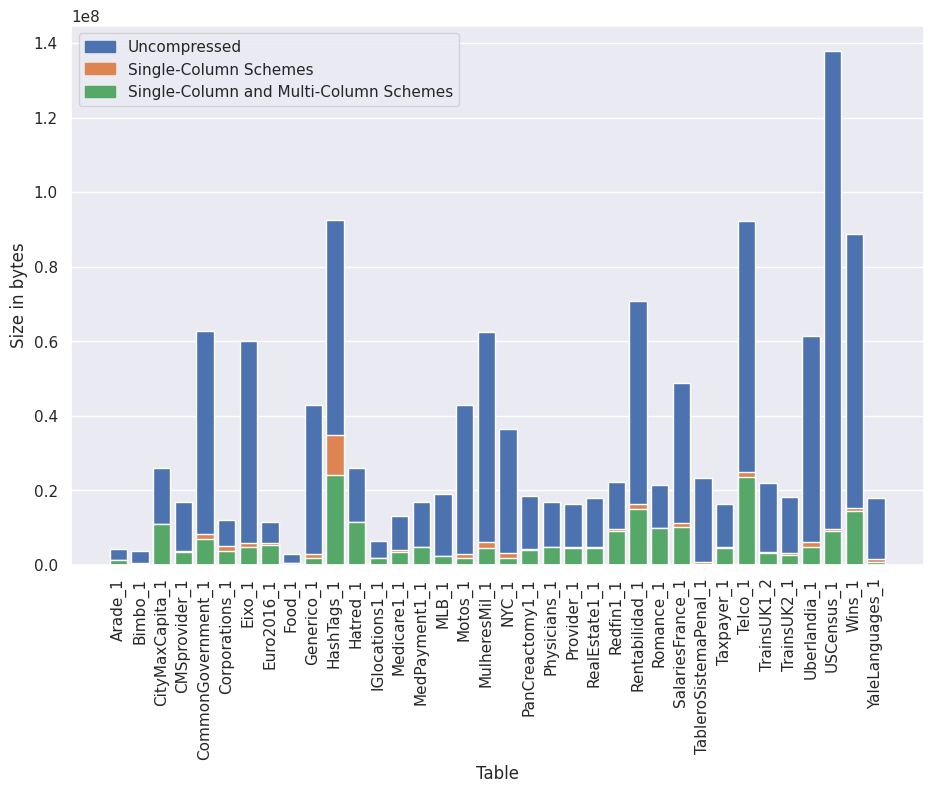

In [334]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../7/655/relation_stats.csv', delimiter="|", nrows=36)

# dfs["compression_ratio"] = dfs["uncompressed"] / dfs["compressed"]
# dfs["c3_compression_ratio"] = dfs["compression_ratio"] * dfs["compression_ratio_improvement"]
# dfs["c3_compression_ratio_improvement"] = dfs["c3_compression_ratio"] - dfs["compression_ratio"]

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["uncompressed"])
p = ax.bar(dfs["Relation"], dfs["compressed"])
p = ax.bar(dfs["Relation"], dfs["c3_compressed"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# mean = dfs["compression_ratio"].mean()
# c3_mean = dfs["c3_compression_ratio"].mean()
# print(mean)
# print(c3_mean)
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.axhline(y=c3_mean, color=sns.color_palette()[1], linestyle='dashed')

# plt.title("How much C3 improved for each table")
plt.ylabel("Size in bytes")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Uncompressed')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='Single-Column Schemes')   
patch3 = mpatches.Patch(color=sns.color_palette()[2], label='Single-Column and Multi-Column Schemes')   
handles.extend([patch, patch2, patch3])
plt.legend(handles=handles)


/tmp/ipykernel_794/125590429.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


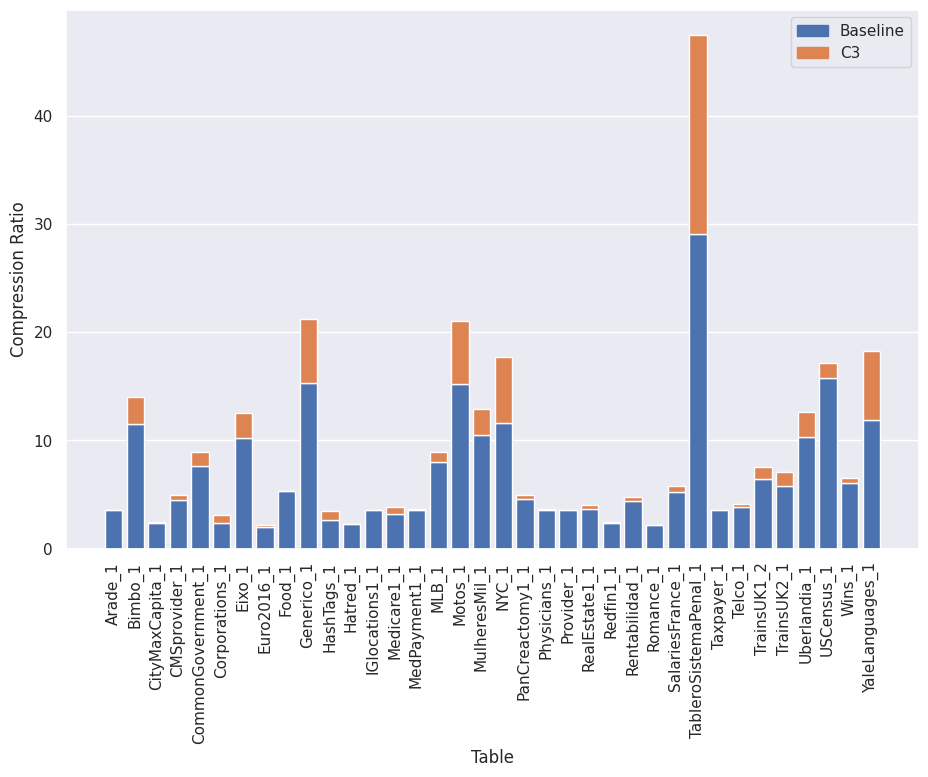

In [418]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../4/65536/relation_stats.csv', delimiter="|", nrows=36)

dfs["compression_ratio"] = dfs["uncompressed"] / dfs["compressed"]
dfs["c3_compression_ratio"] = dfs["compression_ratio"] * dfs["compression_ratio_improvement"]
dfs["c3_compression_ratio_improvement"] = dfs["c3_compression_ratio"] - dfs["compression_ratio"]

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["compression_ratio"])
p = ax.bar(dfs["Relation"], dfs["c3_compression_ratio_improvement"], bottom=dfs["compression_ratio"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# mean = dfs["compression_ratio"].mean()
# c3_mean = dfs["c3_compression_ratio"].mean()
# print(mean)
# print(c3_mean)
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.axhline(y=c3_mean, color=sns.color_palette()[1], linestyle='dashed')

# plt.title("How much C3 improved for each table")
plt.ylabel("Compression Ratio")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Baseline')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='C3')   
handles.extend([patch, patch2])
plt.legend(handles=handles)


   Compression Ratio Improvement Scheme Sharing Mode  \
0                       1.210556                None   
1                       1.196944   Correlation Graph   
2                       1.198333       Final Schemes   

   Excepted Compression Ratios Computed (in millions)  
0                                           8.545116   
1                                           1.550104   
2                                           0.918666   


/tmp/ipykernel_738/1028097342.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])
/tmp/ipykernel_738/1028097342.py:37: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])


Text(0.5, 1.0, 'Compression Ratios for Multi-Row Group Compression (1% sample size)')

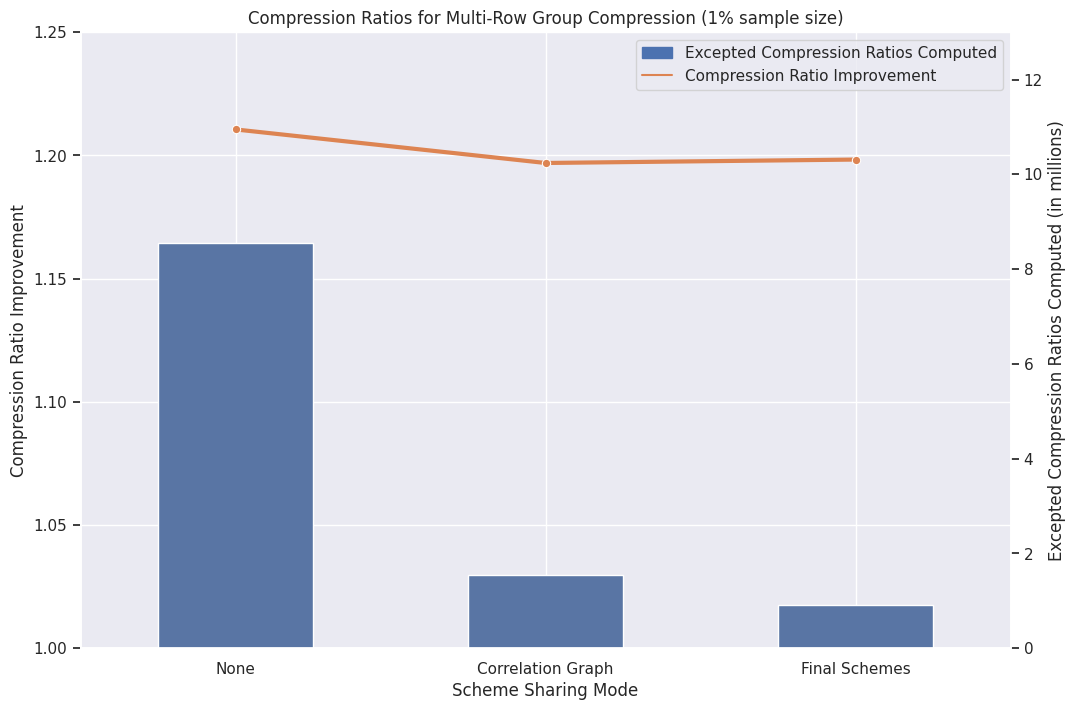

In [19]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

scheme_sharing_options = [0,2,1]
dfs = []
for options in scheme_sharing_options:
    df = pd.read_csv(f'../7/{options}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = [round(x,2) for x in df["compressed"]/df["c3_compressed"]]
    dfs.append(df)
 
avg_cris = []
total_ecrs = []
for df in dfs:
    avg_cris.append(df['improvement'].mean())
    total_ecrs.append(df['compute_ecr_counter'].sum())
avg_cris

df = pd.DataFrame(avg_cris, columns=["Compression Ratio Improvement"])
df["Scheme Sharing Mode"] = ["None", "Correlation Graph", "Final Schemes"]
df["Excepted Compression Ratios Computed (in millions)"] = [x/1000000 for x in total_ecrs]
print(df)

fig, ax1 = plt.subplots(figsize=(12,8))

# LINE PLOT
sns.lineplot(x=df["Scheme Sharing Mode"], 
             y=df["Compression Ratio Improvement"],
             ax=ax1,
             marker="o",
             linewidth = 3,
             color=sns.color_palette()[1])
ax1.set_ylim(1, 1.25)

# BAR PLOT
ax2 = ax1.twinx()
ax2.grid(False)
sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])
ax2.set_ylim(0,13)
ax2.ticklabel_format(style='plain', axis='y')

# Manual Legend
handles, labels = ax2.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Excepted Compression Ratios Computed')   
line = Line2D([0], [0], label='Compression Ratio Improvement', color=sns.color_palette()[1])
handles.extend([patch, line])
plt.legend(handles=handles)

plt.title("Compression Ratios for Multi-Row Group Compression (1% sample size)")


[<generator object <genexpr> at 0x7efd4ceec510>]
          0 sample_size
0  1.244026       660x1
1  1.239068       66x10
2  1.215704       20x33
3  1.211575       10x66
4  1.204006       1x660


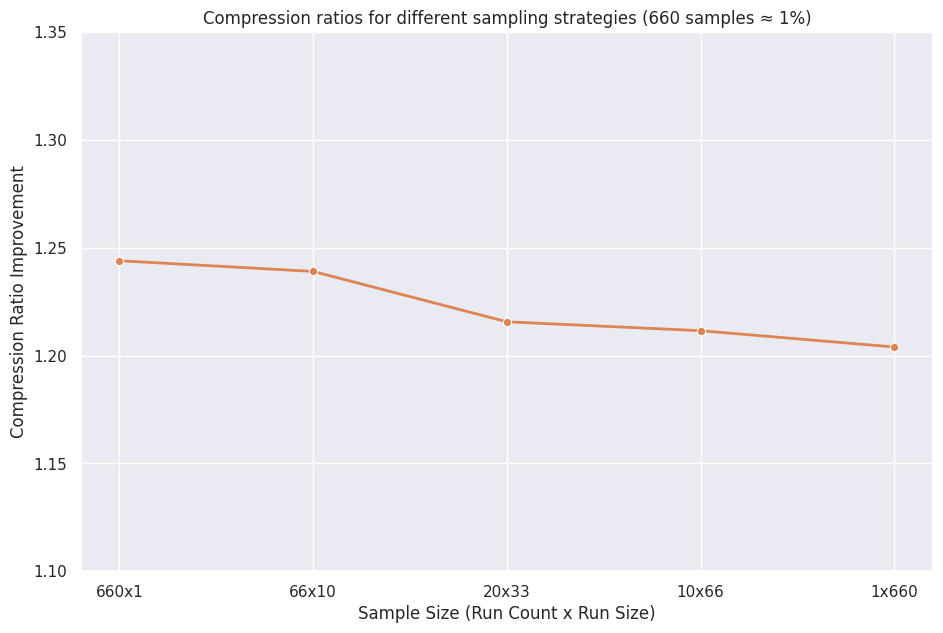

In [38]:
sample_sizes = ["660_1", "66_10", "20_33", "10_66", "1_660"]
sample_size_names = ["660x1", "66x10", "20x33", "10x66", "1x660"]

dfs = []
for sample_size in sample_sizes:
    df = pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36)
    df["improvement"] = df["compressed"]/df["c3_compressed"]
    dfs.append(df)

avg_improvement = []
avg_improvement.append(df['improvement'].mean() for df in dfs)

print(avg_improvement)

df = pd.DataFrame(avg_improvement)
df = df.transpose()
df["sample_size"] = sample_size_names

print(df)

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size (Run Count x Run Size)'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size (Run Count x Run Size)', 
                    y='Compression Ratio Improvement', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    color=sns.color_palette()[1])

plt.title("Compression ratios for different sampling strategies (660 samples ≈ 1%)")
plt.ylim(1.1, 1.35)
plt.show(plot)


In [ ]:
# more analysis ideas:

# already have data:
# number of exceptions for dict1to1 and equality
# which data type combinations have most/most effective schemes
# how many columns compressed with single-col, how many with multi-col schemes

# need more data: